In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
# Load the provided resized image
image = plt.imread("test.png")

# Resized and original image dimensions
resized_width, resized_height = image.shape[1], image.shape[0]
# 7711/(cos 10° + cos 80°) = 6656.2739
# 7541/(cos 10° + cos 80°) = 6509.5268
original_width, original_height = 6509.5268, 6656.2739

# Calculate scaling factors
width_scale = resized_width / original_width
height_scale = resized_height / original_height

# GSD and rectangle dimensions
GSD = 30  # in meters

# Manually enter this: camera image swath H x V
rectangle_width_km = 94.68
rectangle_height_km = 70.2

# Convert rectangle dimensions from kilometers to meters
rectangle_width_m = rectangle_width_km * 1000
rectangle_height_m = rectangle_height_km * 1000

# Determine the rectangle dimensions in pixels for the original image
rectangle_width_pixels_original = rectangle_width_m / GSD
rectangle_height_pixels_original = rectangle_height_m / GSD

# Adjust the rectangle dimensions for the resized image
rectangle_width_pixels_resized = rectangle_width_pixels_original * width_scale
rectangle_height_pixels_resized = rectangle_height_pixels_original * height_scale

# Plotting
fig, ax = plt.subplots()
ax.imshow(image, cmap='gray')

# Assuming the rectangle's top-left corner starts at (0,0)
rect = plt.Rectangle((100, 200), rectangle_width_pixels_resized, rectangle_height_pixels_resized, linewidth=2, edgecolor='r', facecolor='none')
ax.add_patch(rect)

plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'test.png'

In [3]:
# resize the image.png to 6509.5268 x 6656.2739
image = cv2.imread('image.png')
resized_image = cv2.resize(image, (6509, 6656))
cv2.imwrite('mock_image.png', resized_image)

True

6509 6656
4339 3217
1301.8000000000002 1331.2
6509 6656
4339 3217
1301.8000000000002 1331.2


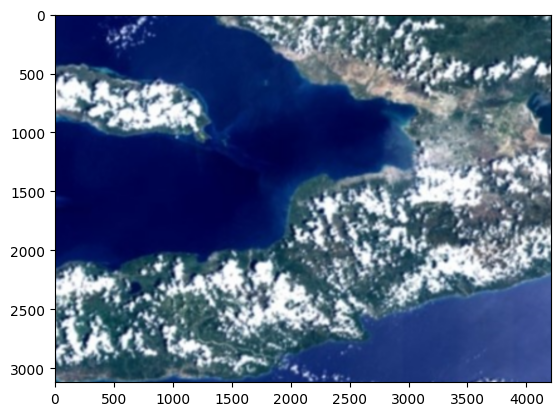

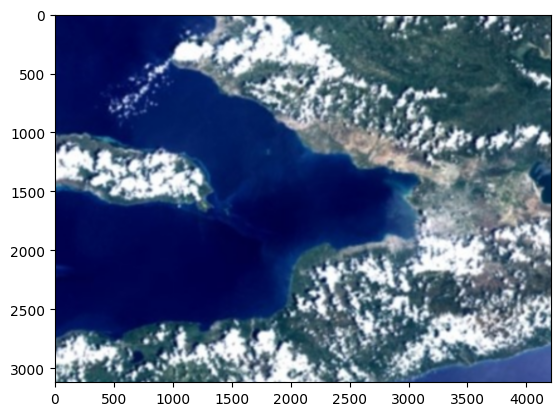

In [8]:
# declare hardware parameters
# camera:
camera_swath_width = 130.185 * 1000
camera_swath_height = 96.525 * 1000

camera_image_width_pixel_num = 4208
camera_image_height_pixel_num = 3120
# landsat:
# landsat swath is calculated based on landsat gsd and given landsat image size
landsat_gsd = 30

# threshold for where the camera image is considered to be in the landsat image
threshold_x = 0.2
threshold_y = 0.2

# create a function to pick camera images from the Landsat image
def pick_camera_images(landsat_image = "./image.png", num = 1):
    # load the landsat image
    image = plt.imread(landsat_image)
    # get the landsat image size
    landsat_height, landsat_width = image.shape[0], image.shape[1]
    # calculate the landsat swath
    landsat_swath_width = landsat_width * landsat_gsd
    landsat_swath_height = landsat_height * landsat_gsd
    # calculate the pixels needed for the camera image
    lansat_camera_width_num_pixels = int(camera_swath_width / landsat_swath_width * landsat_width)
    lansat_camera_height_num_pixels = int(camera_swath_height / landsat_swath_height * landsat_height)
    # create a list to store the camera images
    camera_images = []
    # loop through the number of camera images
    for i in range(num):
        # pick a random portion of the landsat image as the camera image
        # pick a random start point
        print(landsat_width, landsat_height)
        print(lansat_camera_width_num_pixels, lansat_camera_height_num_pixels)
        print(threshold_x * landsat_width, threshold_y * landsat_height)
        start_point_x = np.random.randint(threshold_x * landsat_width, landsat_width - lansat_camera_width_num_pixels)
        start_point_y = np.random.randint(threshold_y * landsat_height, landsat_height - lansat_camera_height_num_pixels)
        # pick the camera image
        # print(start_point_x, start_point_y)
        # print(lansat_camera_height_num_pixels, lansat_camera_width_num_pixels)
        camera_image = image[start_point_y:start_point_y + lansat_camera_height_num_pixels, start_point_x:start_point_x + lansat_camera_width_num_pixels]
        # resize the camera image to the camera image size
        camera_image = cv2.resize(camera_image, (camera_image_width_pixel_num, camera_image_height_pixel_num))
        # add the camera image to the list
        camera_images.append(camera_image)
    return camera_images

# pick 2 camera images from the landsat image
num_camera_images = 2
camera_images = pick_camera_images(landsat_image = "./mock_image.png", num = num_camera_images)
# plot and save the camera images
for i in range(num_camera_images):
    plt.imshow(camera_images[i])
    plt.savefig("./camera_image_" + str(i) + ".png")
    plt.show()